In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from rasl import rasl
from skimage.transform import warp
from skimage.filters import threshold_otsu

In [51]:
def align(im1, im2):
    I, L, T, _ = rasl([im1, im2])
    im1 = warp(im1, T[0])
    im2 = warp(im2, T[1])
    return im1, im2

def crop(img, ref):
    im1, im2 = align(img, ref)
    #im1 = skimage.exposure.adjust_log(im1, 1.05)
    #im2 = skimage.exposure.adjust_log(im2, 1.05)
    #im1, im2 = img, ref
    blur0 = cv2.GaussianBlur(im1.copy(), (9, 9), 0)
    blur1 = cv2.GaussianBlur(im2.copy(), (9, 9), 0)
    difference = cv2.absdiff(blur0, blur1)
    
    plt.figure(figsize=(7, 10))
    plt.imshow(blur0, 'gray')
    
    plt.figure(figsize=(7, 10))
    plt.imshow(blur1, 'gray')
    
    
    
    plt.figure(figsize=(7, 10))
    plt.imshow(difference, 'gray')
    plt.colorbar()
    
    #thresh = threshold_otsu(difference)
    thresh = 0.1
    threshed = cv2.threshold(difference, thresh, 1, cv2.THRESH_BINARY)[1]
    
    plt.figure(figsize=(7, 10))
    plt.imshow(threshed, 'gray')
    plt.colorbar()

    kernel_small = np.ones((6, 6), np.uint8) 
    kernel_large = np.ones((15,15), np.uint8) 

    img_erosion = cv2.erode(threshed, kernel_small, iterations=1) 
    mask = cv2.dilate(img_erosion, kernel_large, iterations=1) 

    #plt.figure(figsize=(7, 10))
    #plt.imshow(mask*im1, cmap='gray')

In [13]:
import skimage

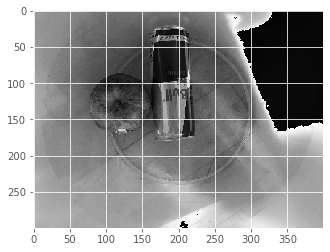

In [35]:
img1 - img2

In [54]:
img_list = [cv2.resize(cv2.imread('figs/og2/{}.jpg'.format(i), cv2.IMREAD_GRAYSCALE), (400, 300)) 
            for i in np.arange(0, 8, 1)]

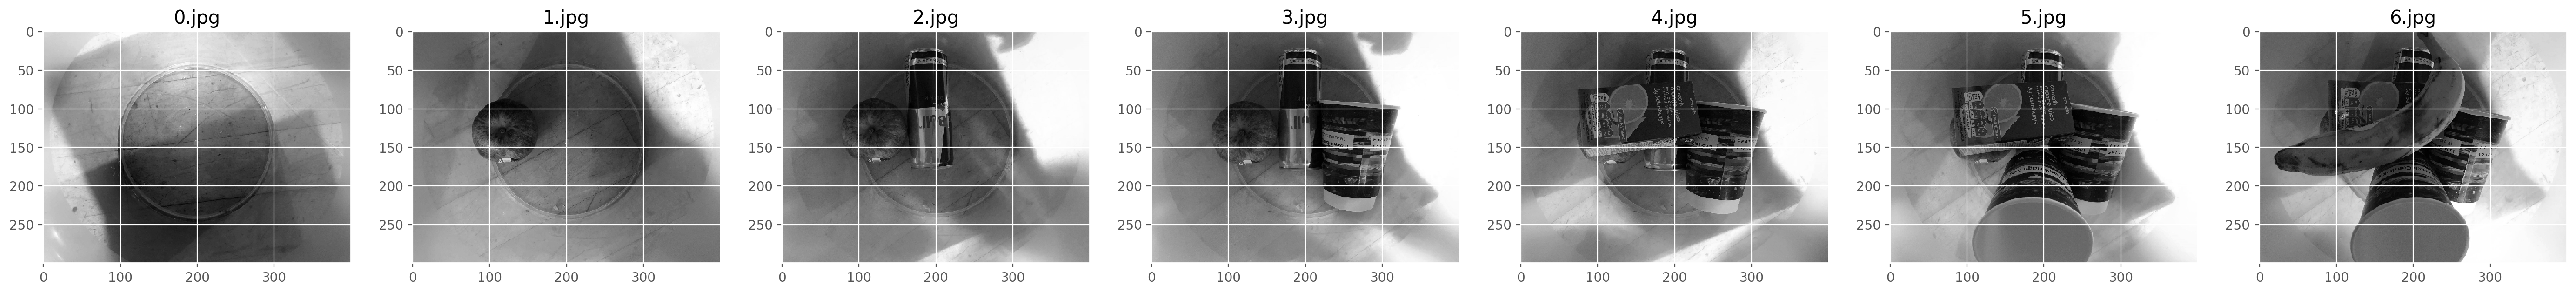

In [55]:
fig, ax = plt.subplots(1, 7, figsize=(35, 5), dpi=200)
for i in range(7):
    ax[i].imshow(img_list[i], cmap='gray')
    ax[i].set_title('{}.jpg'.format(i))
plt.show()

completed 37 inner iterations, rank=1
completed 37 inner iterations, rank=1


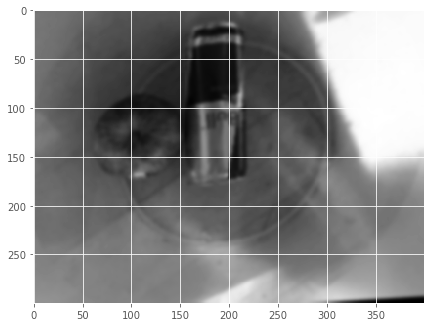

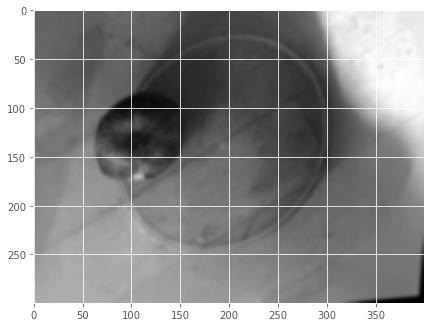

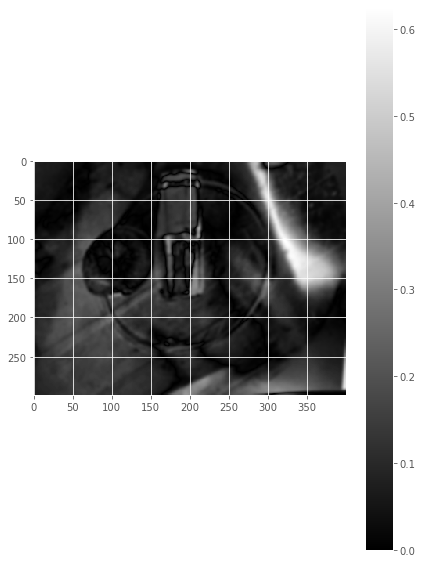

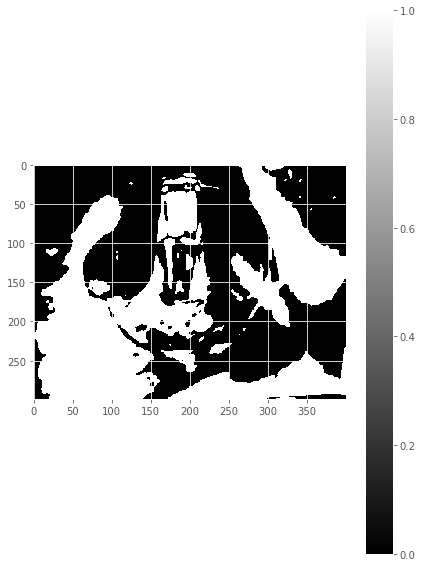

In [52]:
crop(img_list[1], img_list[0])